### Variables

Molecular Data

In [3]:
weight = 3.5 # in mg
molar = 851.5321 # in g/mol
usedpart = 1/5 # amount taken from initial 
vol = 50 # mL

Path

In [4]:
path = r'C:\Users\jenso\PowerFolders\Forschung\UVVis\JK175\\'

TFA data

In [5]:
tfa = 1 # mL
vTfa = 50 # mL
MTfa = 114.02 # g/mol
rTfa = 1.48 # g/mL
nTfa = tfa*rTfa/MTfa # mol
npVTfa = nTfa/vTfa # mol/mL
print(str(nTfa) + " mol, " + str(npVTfa) + " mol/mL")

0.012980178915979653 mol, 0.0002596035783195931 mol/mL


Calculate Moles

In [6]:
initial_moles = weight/1000/molar
moles = initial_moles*usedpart
print(str(initial_moles) + " mol initial, " + str(moles) + " mol used")

4.110238474861957e-06 mol initial, 8.220476949723915e-07 mol used


### Load Data

In [7]:
import os
import fnmatch
from natsort import humansorted
import pandas as pd

In [8]:
data = []
for root, dir, files in os.walk(path):
    for file in fnmatch.filter(files, "*.csv"):
        data.append(os.path.join(root, file))
data = humansorted(data)

In [9]:
df = pd.DataFrame()
for item in data:
    df = pd.concat([df, (pd.read_csv(item, header=1, usecols=[0,1]))], axis=1)
df

,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,...,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs
0,1100.025879,-0.011582,1100.025879,0.005949,1100.025879,0.003893,1100.025879,0.007947,1100.025879,0.020639,...,1100.025879,0.033812,1100.025879,0.001872,1100.025879,0.001710,1100.025879,0.021603,1100.025879,0.017030
1,1098.970581,0.002496,1098.970581,0.005092,1098.970581,0.016359,1098.970581,0.026296,1098.970581,0.013095,...,1098.970581,0.017148,1098.970581,0.027587,1098.970581,0.036812,1098.970581,0.016558,1098.970581,0.032313
2,1098.031738,0.017135,1098.031738,-0.002835,1098.031738,0.043869,1098.031738,0.020117,1098.031738,0.022030,...,1098.031738,-0.002130,1098.031738,0.022008,1098.031738,0.055116,1098.031738,0.038556,1098.031738,0.022083
3,1096.974854,0.006029,1096.974854,0.013095,1096.974854,-0.014629,1096.974854,0.018265,1096.974854,-0.000265,...,1096.974854,0.015269,1096.974854,0.010185,1096.974854,0.046214,1096.974854,0.007579,1096.974854,0.021838
4,1096.034668,0.025540,1096.034668,-0.004041,1096.034668,0.008120,1096.034668,-0.002791,1096.034668,0.033211,...,1096.034668,0.020648,1096.034668,0.028975,1096.034668,0.040723,1096.034668,0.012541,1096.034668,-0.009073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,204.019760,1.083012,204.019760,1.276716,204.019760,1.545892,204.019760,0.598404,204.019760,1.672720,...,204.019760,0.915733,204.019760,10.000000,204.019760,1.395566,204.019760,10.000000,204.019760,10.000000
897,203.076782,0.892537,203.076782,0.601385,203.076782,0.802329,203.076782,1.176769,203.076782,1.007999,...,203.076782,10.000000,203.076782,10.000000,203.076782,10.000000,203.076782,10.000000,203.076782,0.666634
898,201.976547,0.891151,201.976547,0.585455,201.976547,0.965326,201.976547,1.469908,201.976547,0.688033,...,201.976547,10.000000,201.976547,10.000000,201.976547,1.523297,201.976547,10.000000,201.976547,10.000000
899,201.033417,0.359944,201.033417,10.000000,201.033417,0.572303,201.033417,0.585544,201.033417,0.681315,...,201.033417,10.000000,201.033417,10.000000,201.033417,1.572047,201.033417,10.000000,201.033417,10.000000


### Print Uncorrected Spectra

(0.0, 0.75)

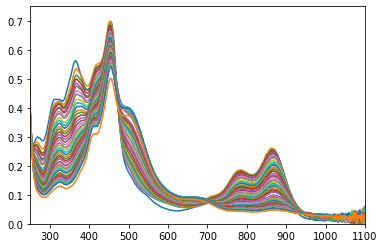

In [10]:
import matplotlib.pyplot as plt
import numpy as np
num_spc = int(df.shape[1])
fig,ax = plt.subplots()
for i in range(0, num_spc, 2):
    x = df.iloc[:,i]
    y = df.iloc[:,i+1]
    plt.plot(x,y)
ax.set_xlim(250,1100)
ax.set_ylim(0,.75)

### Correction

In [11]:
corr = df.copy(deep=True)
max = 0
idx = corr[corr.iloc[:,0].lt(300.0)].index[0]
soret = corr.iloc[:idx, 1].idxmax()


for i in range(0, num_spc, 2):
    fac = moles/(((i/2)+50)/1000)
    corr.iloc[:,i+1] = corr.iloc[:,i+1]/fac
    if max < corr.iloc[:,i+1][soret]:
        max = corr.iloc[:,i+1][soret]
corr

,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,...,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs
0,1100.025879,-704.485900,1100.025879,369.080759,1100.025879,246.229605,1100.025879,512.397787,1100.025879,1355.768202,...,1100.025879,3.578459e+03,1100.025879,2.004374e+02,1100.025879,1.851435e+02,1100.025879,2.365106e+03,1100.025879,1.885161e+03
1,1098.970581,151.843973,1098.970581,315.909985,1098.970581,1034.825030,1098.970581,1695.360294,1098.970581,860.200352,...,1098.970581,1.814852e+03,1098.970581,2.953193e+03,1098.970581,3.985524e+03,1098.970581,1.812808e+03,1098.970581,3.577017e+03
2,1098.031738,1042.187721,1098.031738,-175.885497,1098.031738,2775.012520,1098.031738,1297.006356,1098.031738,1447.135679,...,1098.031738,-2.254192e+02,1098.031738,2.355998e+03,1098.031738,5.967178e+03,1098.031738,4.221250e+03,1098.031738,2.444531e+03
3,1096.974854,366.690386,1096.974854,812.386598,1096.974854,-925.412986,1096.974854,1177.605566,1096.974854,-17.407188,...,1096.974854,1.616021e+03,1096.974854,1.090334e+03,1096.974854,5.003415e+03,1096.974854,8.297314e+02,1096.974854,2.417410e+03
4,1096.034668,1553.455735,1096.034668,-250.710371,1096.034668,513.650548,1096.034668,-179.967398,1096.034668,2181.649527,...,1096.034668,2.185278e+03,1096.034668,3.101800e+03,1096.034668,4.408957e+03,1096.034668,1.373055e+03,1096.034668,-1.004369e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,204.019760,65872.819279,204.019760,79207.702939,204.019760,97788.003187,204.019760,38580.964002,204.019760,109880.328960,...,204.019760,9.691504e+04,204.019760,1.070497e+06,204.019760,1.510926e+05,204.019760,1.094827e+06,204.019760,1.106992e+06
897,203.076782,54287.421719,203.076782,37310.020832,203.076782,50752.680105,203.076782,75869.976176,203.076782,66215.082362,...,203.076782,1.058333e+06,203.076782,1.070497e+06,203.076782,1.082662e+06,203.076782,1.094827e+06,203.076782,7.379582e+04
898,201.976547,54203.113594,201.976547,36321.735495,201.976547,61063.309209,201.976547,94769.583464,201.976547,45196.640390,...,201.976547,1.058333e+06,201.976547,1.070497e+06,201.976547,1.649216e+05,201.976547,1.094827e+06,201.976547,1.106992e+06
899,201.033417,21893.139978,201.033417,620401.958571,201.033417,36201.963141,201.033417,37751.870095,201.033417,44755.315351,...,201.033417,1.058333e+06,201.033417,1.070497e+06,201.033417,1.701996e+05,201.033417,1.094827e+06,201.033417,1.106992e+06


In [12]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

(0.0, 65161.03530754259)

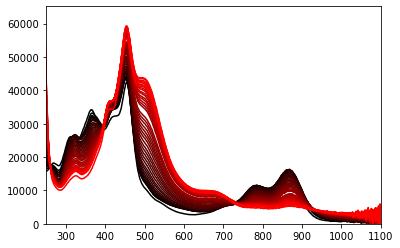

In [13]:
#cm = plt.get_cmap('Set3') 
cols = cm(np.linspace(0,1,int(num_spc/2) ))
fig,ax = plt.subplots()
for i in range(0, num_spc, 2):
    x = corr.iloc[:,i]
    y = corr.iloc[:,i+1]
    plt.plot(x,y, color=cols[int(i/2)])
ax.set_xlim(250,1100)
ax.set_ylim(0, max + 0.1*max)
